### purpose

set up code to run the complex sims through gradient forest scripts, create files for RDA and RONA too

In [1]:
from pythonimports import *

import MVP_03_validate_gradient_forests as mvp03
import MVP_06_validate_RONA as mvp06
import MVP_summary_functions as mvp

import seaborn as sns

# parallel engines
lview, dview = get_client(cluster_id='1677852350-uvth', profile='lotterhos')

t1 = dt.now()  # notebook timer

outerdir = '/home/b.lind/offsets/run_20220919_tutorial'
tdir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial'

training_dir = makedir(op.join(outerdir, 'gradient_forests/training/training_files'))
gf_outdir = makedir(training_dir.replace('/training_files', '/training_outfiles'))
gf_shdir = makedir(training_dir.replace('/training_files', '/training_shfiles'))
rona_training_dir = makedir(training_dir.replace('/gradient_forests/', '/RONA/'))

mvp.latest_commit()
session_info.show()

36 36
#########################################################
Today:	March 03, 2023 - 12:16:52
python version: 3.8.5

Current commit of pythonimports:
commit 8d4f83fd91caa2e58acbafcadfde07d19ae79379  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Mar 3 00:48:36 2023 -0500

Current commit of MVP_offsets:
commit d24363688641c3c7e26b5202d74aefc5db4de83c  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Wed Mar 1 16:34:25 2023 -0500
#########################################################



# look at previous formats for MVP_gf_training_script.R's infiles

```
/home/b.lind/anaconda3/envs/r35/lib/R/bin/Rscript \
/home/b.lind/code/MVP-offsets/01_src/MVP_gf_training_script.R \
1231319_Rout_Gmat_sample_maf-gt-p01_GFready_ind_adaptive.txt \  # snpfile
1231319_envfile_GFready_ind.txt \  # envfile
1231319_rangefile_GFready_ind.txt \  # range_file
1231319_GF_training_ind_adaptive \
/home/b.lind/offsets/run_20220919_225-450/gradient_forests/training/training_outfiles
```

### snpfile

are row names important?  i don't think so

columns are locus names

In [2]:
# look at an example snp file so I can construct something similar
exdir = '/home/b.lind/offsets/run_20220919_225-450/gradient_forests/training/training_files'

snpfile = op.join(exdir, '1231319_Rout_Gmat_sample_maf-gt-p01_GFready_pooled_adaptive.txt')

exsnps = pd.read_table(snpfile)

exsnps

,1-77,1-1163,1-2933,1-3524,1-7156,1-8355,1-9339,1-10612,1-11758,1-12599,1-13146,1-13432,1-15483_2,1-16290,1-17240,1-17933,1-18126,1-18953,1-19565,1-20241,1-23113,1-23635,1-30153,1-31659,1-32351_2,1-34089,1-34323,1-36057,1-36934,1-37078,1-37786,1-38428,1-41089,1-41779,1-42644,1-42686,1-44526,2-50762,2-51468,2-51924,2-51945,2-52617,2-60478,2-62987,2-64236,2-66430,2-70623,2-70917,2-72149,2-72395,...,9-436480,9-436706,9-438910,9-441084,9-441812,9-443388,9-447616,9-448301,9-449934,10-450535,10-452155,10-454151,10-454695,10-456330,10-456792,10-458327,10-458517,10-459364,10-459811,10-460051,10-462471,10-463317,10-463627,10-465791,10-468208,10-468692,10-471968,10-472819,10-473593,10-474405,10-474479,10-474930,10-479563,10-480299,10-480651,10-481802,10-484345,10-490523,10-492021,10-493584,10-496222,10-497622,10-497928,10-498481,10-498676,10-498832,10-499026,10-499127,10-499598,index
0,1.00,0.00,0.0,0.70,0.00,0.45,0.0,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.85,0.10,0.0,0.0,0.0,0.85,0.25,0.0,0.00,0.0,0.0,0.05,0.05,0.00,0.00,0.0,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.00,0.40,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.25,0.75,0.00,0.00,0.95,0.0,0.0,0.00,0.0,0.0,0.65,0.00,0.0,0.0,0.00,0.0,0.15,0.0,0.45,0.00,0.0,0.25,0.0,0.0,0.0,0.00,0.60,0.0,0.00,0.70,0.00,0.15,0.00,0.15,0.0,0.0,0.15,0.0,0.55,0.0,0.0,0.0,0.00,0.20,0.00,0.00,0.00,1
1,1.00,0.00,0.0,0.80,0.00,0.35,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.95,0.05,0.0,0.0,0.0,0.95,0.25,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.00,0.25,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.10,0.90,0.00,0.00,0.90,0.0,0.1,0.00,0.0,0.0,0.75,0.05,0.0,0.0,0.05,0.0,0.10,0.0,0.45,0.00,0.0,0.10,0.0,0.0,0.0,0.00,0.75,0.0,0.00,0.80,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.50,0.0,0.0,0.0,0.00,0.05,0.00,0.00,0.00,2
2,0.95,0.00,0.0,0.80,0.00,0.30,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0.95,0.05,0.0,0.0,0.0,0.90,0.20,0.0,0.00,0.0,0.0,0.05,0.05,0.00,0.00,0.0,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.00,0.25,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.15,0.85,0.00,0.00,0.90,0.0,0.0,0.00,0.0,0.0,0.60,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.30,0.00,0.0,0.10,0.0,0.0,0.0,0.10,0.55,0.0,0.00,0.70,0.00,0.15,0.00,0.25,0.0,0.0,0.00,0.0,0.35,0.0,0.0,0.0,0.00,0.20,0.15,0.00,0.15,3
3,1.00,0.00,0.0,0.70,0.00,0.70,0.0,0.0,0.40,0.0,0.0,0.0,0.0,0.0,0.60,0.40,0.0,0.0,0.0,0.70,0.20,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.00,0.0,0.00,0.10,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.15,0.90,0.00,0.00,0.80,0.0,0.1,0.00,0.0,0.0,0.70,0.05,0.0,0.0,0.05,0.0,0.15,0.0,0.20,0.00,0.0,0.45,0.0,0.0,0.0,0.00,0.45,0.0,0.00,0.75,0.00,0.10,0.00,0.00,0.1,0.0,0.15,0.0,0.45,0.0,0.0,0.0,0.00,0.10,0.10,0.00,0.10,4
4,0.80,0.00,0.0,0.55,0.05,0.30,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.75,0.15,0.0,0.0,0.0,0.65,0.15,0.0,0.00,0.0,0.0,0.05,0.05,0.00,0.05,0.0,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.00,0.30,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.15,0.85,0.00,0.00,0.95,0.0,0.0,0.00,0.0,0.0,0.55,0.00,0.0,0.0,0.00,0.0,0.10,0.0,0.00,0.00,0.0,0.15,0.0,0.0,0.0,0.05,0.70,0.0,0.00,0.75,0.00,0.15,0.00,0.25,0.0,0.0,0.10,0.0,0.55,0.0,0.0,0.0,0.05,0.00,0.25,0.00,0.25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.95,0.0,0.00,0.00,0.00,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.1,0.00,0.00,0.0,0.10,0.0,0.0,0.00,0.00,0.10,0.00,0.1,0.00,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.05,0.0,0.20,1.00,0.0,0.0,0.00,0.10,0.0,...,0.00,0.0,0.00,0.05,0.00,0.85,0.00,0.0,0.0,0.15,0.0,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.00,0.00,0.0,0.15,0.0,0.0,0.0,0.00,0.00,0.0,0.40,0.00,0.45,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0

### envfile

row names are indID or popID

col names are env names

In [3]:
# look at an example env file so I can construct something similar
envfile = op.join(exdir, '1231319_envfile_GFready_pooled.txt')

envdata = pd.read_table(envfile, index_col=0)

envdata

,sal_opt,temp_opt
1,-1.000000,-1.0
2,-0.777778,-1.0
3,-0.555556,-1.0
4,-0.333333,-1.0
5,-0.111111,-1.0
...,...,...
96,0.111111,1.0
97,0.333333,1.0
98,0.555556,1.0
99,0.777778,1.0


### rangefile

row names not important


In [4]:
# look at an example range file so I can construct something similar
rfile = op.join(exdir, '1231319_rangefile_GFready_pooled.txt')

rangedata = pd.read_table(rfile)

rangedata

,lat,lon,sal_opt,temp_opt
0,1.0,1.0,-1.000000,-1.0
1,1.0,2.0,-0.777778,-1.0
2,1.0,3.0,-0.555556,-1.0
3,1.0,4.0,-0.333333,-1.0
4,1.0,5.0,-0.111111,-1.0
...,...,...,...,...
95,10.0,6.0,0.111111,1.0
96,10.0,7.0,0.333333,1.0
97,10.0,8.0,0.555556,1.0
98,10.0,9.0,0.777778,1.0


In [5]:
# ind
for i, j in enumerate(rangedata.index):
    assert i==j , (i, j)

In [6]:
# pooled
for i, j in enumerate(rangedata.index):
    assert i==j , (i, j)

# assign inds to populations 

In [7]:
inds = pd.read_table(op.join(tdir, 'Individuals.txt'), delim_whitespace=True)

print(inds.shape)

inds.head()

(1000, 15)


,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751


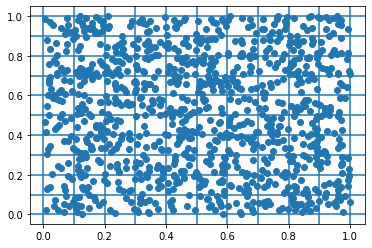

In [8]:
# how to assign pop ID
plt.scatter(inds.x, inds.y)
for x in range(0, 11, 1):
    
    plt.axhline(y=x / 10)
    plt.axvline(x=x / 10)

In [9]:
# assign indivudals to populations in the grid above, name pops like in MVP files

popsamps = defaultdict(list)

samppop = {}

poplocs = {}

pop = 1
y_start = 0
for y in range(1, 11, 1):
    y_end = y / 10
    
    x_start = 0
    for x in range(1, 11, 1):
        x_end = x / 10
        
#         print(f'{y_start} {y_end} {x_start} {x_end}')
        
        pop_inds = inds[(inds.y > y_start) & (inds.y <= y_end) &
                        (inds.x > x_start) & (inds.x <= x_end)
                       ]
        
        popsamps[pop] = pop_inds.index.to_list()
        print(pop, nrow(pop_inds))
        
        y_coord = y_start + (y_end - y_start) / 2
        x_coord = x_start + (x_end - x_start) / 2
        
        poplocs[pop] = (round(x_coord, 2), round(y_coord, 2))
        
        for ind in pop_inds.index:
            samppop[ind] = pop
        
        pop += 1
        
        x_start = x_end
    
    
    y_start = y_end

1 9
2 13
3 5
4 10
5 7
6 12
7 9
8 9
9 15
10 10
11 7
12 9
13 8
14 8
15 9
16 12
17 11
18 10
19 11
20 11
21 4
22 12
23 7
24 13
25 12
26 12
27 8
28 9
29 13
30 11
31 8
32 14
33 10
34 9
35 11
36 7
37 12
38 8
39 10
40 9
41 8
42 10
43 9
44 4
45 12
46 7
47 10
48 15
49 10
50 7
51 8
52 10
53 11
54 13
55 11
56 8
57 7
58 7
59 13
60 9
61 13
62 7
63 8
64 11
65 8
66 19
67 10
68 8
69 8
70 4
71 8
72 15
73 15
74 9
75 16
76 11
77 11
78 7
79 18
80 9
81 7
82 5
83 10
84 13
85 10
86 11
87 10
88 9
89 15
90 10
91 9
92 19
93 6
94 9
95 9
96 10
97 7
98 13
99 7
100 13


Text(0.5, 1.0, 'number of individuals per pop')

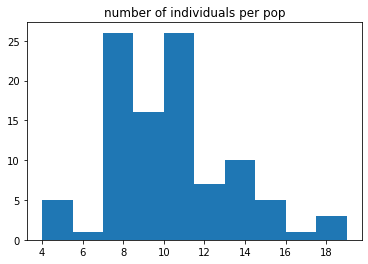

In [10]:
plt.hist([len(samps) for pop, samps in popsamps.items()])
plt.title('number of individuals per pop')

In [11]:
poplocs

{1: (0.05, 0.05),
 2: (0.15, 0.05),
 3: (0.25, 0.05),
 4: (0.35, 0.05),
 5: (0.45, 0.05),
 6: (0.55, 0.05),
 7: (0.65, 0.05),
 8: (0.75, 0.05),
 9: (0.85, 0.05),
 10: (0.95, 0.05),
 11: (0.05, 0.15),
 12: (0.15, 0.15),
 13: (0.25, 0.15),
 14: (0.35, 0.15),
 15: (0.45, 0.15),
 16: (0.55, 0.15),
 17: (0.65, 0.15),
 18: (0.75, 0.15),
 19: (0.85, 0.15),
 20: (0.95, 0.15),
 21: (0.05, 0.25),
 22: (0.15, 0.25),
 23: (0.25, 0.25),
 24: (0.35, 0.25),
 25: (0.45, 0.25),
 26: (0.55, 0.25),
 27: (0.65, 0.25),
 28: (0.75, 0.25),
 29: (0.85, 0.25),
 30: (0.95, 0.25),
 31: (0.05, 0.35),
 32: (0.15, 0.35),
 33: (0.25, 0.35),
 34: (0.35, 0.35),
 35: (0.45, 0.35),
 36: (0.55, 0.35),
 37: (0.65, 0.35),
 38: (0.75, 0.35),
 39: (0.85, 0.35),
 40: (0.95, 0.35),
 41: (0.05, 0.45),
 42: (0.15, 0.45),
 43: (0.25, 0.45),
 44: (0.35, 0.45),
 45: (0.45, 0.45),
 46: (0.55, 0.45),
 47: (0.65, 0.45),
 48: (0.75, 0.45),
 49: (0.85, 0.45),
 50: (0.95, 0.45),
 51: (0.05, 0.55),
 52: (0.15, 0.55),
 53: (0.25, 0.55),
 5

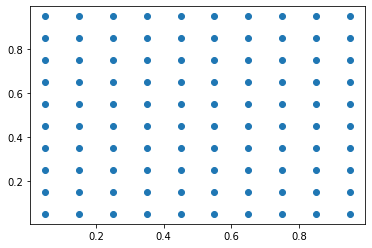

In [12]:
# make sure I got the poplocs correct
xvals = [loc[0] for pop, loc in poplocs.items()]
yvals = [loc[1] for pop, loc in poplocs.items()]

plt.scatter(xvals, yvals)

In [13]:
poplocs

{1: (0.05, 0.05),
 2: (0.15, 0.05),
 3: (0.25, 0.05),
 4: (0.35, 0.05),
 5: (0.45, 0.05),
 6: (0.55, 0.05),
 7: (0.65, 0.05),
 8: (0.75, 0.05),
 9: (0.85, 0.05),
 10: (0.95, 0.05),
 11: (0.05, 0.15),
 12: (0.15, 0.15),
 13: (0.25, 0.15),
 14: (0.35, 0.15),
 15: (0.45, 0.15),
 16: (0.55, 0.15),
 17: (0.65, 0.15),
 18: (0.75, 0.15),
 19: (0.85, 0.15),
 20: (0.95, 0.15),
 21: (0.05, 0.25),
 22: (0.15, 0.25),
 23: (0.25, 0.25),
 24: (0.35, 0.25),
 25: (0.45, 0.25),
 26: (0.55, 0.25),
 27: (0.65, 0.25),
 28: (0.75, 0.25),
 29: (0.85, 0.25),
 30: (0.95, 0.25),
 31: (0.05, 0.35),
 32: (0.15, 0.35),
 33: (0.25, 0.35),
 34: (0.35, 0.35),
 35: (0.45, 0.35),
 36: (0.55, 0.35),
 37: (0.65, 0.35),
 38: (0.75, 0.35),
 39: (0.85, 0.35),
 40: (0.95, 0.35),
 41: (0.05, 0.45),
 42: (0.15, 0.45),
 43: (0.25, 0.45),
 44: (0.35, 0.45),
 45: (0.45, 0.45),
 46: (0.55, 0.45),
 47: (0.65, 0.45),
 48: (0.75, 0.45),
 49: (0.85, 0.45),
 50: (0.95, 0.45),
 51: (0.05, 0.55),
 52: (0.15, 0.55),
 53: (0.25, 0.55),
 5

In [14]:
# fill in a dataframe to see how pops look, convert lat/long to integer
df = mvp03.blank_dataframe()

new_locs = {}
for pop, (lon, lat) in poplocs.items():
    # convert to integer
    lon = round((lon + 0.05) * 10)
    lat = round((lat + 0.05) * 10)
    
    df.loc[lat, lon] = pop
    
    new_locs[pop] = (int(lon), int(lat))

df

,1,2,3,4,5,6,7,8,9,10
10,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
9,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0
8,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0
7,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
6,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
5,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
4,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0
3,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
2,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


In [15]:
new_locs

{1: (1, 1),
 2: (2, 1),
 3: (3, 1),
 4: (4, 1),
 5: (5, 1),
 6: (6, 1),
 7: (7, 1),
 8: (8, 1),
 9: (9, 1),
 10: (10, 1),
 11: (1, 2),
 12: (2, 2),
 13: (3, 2),
 14: (4, 2),
 15: (5, 2),
 16: (6, 2),
 17: (7, 2),
 18: (8, 2),
 19: (9, 2),
 20: (10, 2),
 21: (1, 3),
 22: (2, 3),
 23: (3, 3),
 24: (4, 3),
 25: (5, 3),
 26: (6, 3),
 27: (7, 3),
 28: (8, 3),
 29: (9, 3),
 30: (10, 3),
 31: (1, 4),
 32: (2, 4),
 33: (3, 4),
 34: (4, 4),
 35: (5, 4),
 36: (6, 4),
 37: (7, 4),
 38: (8, 4),
 39: (9, 4),
 40: (10, 4),
 41: (1, 5),
 42: (2, 5),
 43: (3, 5),
 44: (4, 5),
 45: (5, 5),
 46: (6, 5),
 47: (7, 5),
 48: (8, 5),
 49: (9, 5),
 50: (10, 5),
 51: (1, 6),
 52: (2, 6),
 53: (3, 6),
 54: (4, 6),
 55: (5, 6),
 56: (6, 6),
 57: (7, 6),
 58: (8, 6),
 59: (9, 6),
 60: (10, 6),
 61: (1, 7),
 62: (2, 7),
 63: (3, 7),
 64: (4, 7),
 65: (5, 7),
 66: (6, 7),
 67: (7, 7),
 68: (8, 7),
 69: (9, 7),
 70: (10, 7),
 71: (1, 8),
 72: (2, 8),
 73: (3, 8),
 74: (4, 8),
 75: (5, 8),
 76: (6, 8),
 77: (7, 8),
 

In [16]:
# compare locations to MVP locations from arbitrary seed
subset, locations, old_envdata = mvp06.get_pop_data(mvp.slimdir, '1231094')

df = mvp03.blank_dataframe()

for pop, (lon, lat) in locations.iterrows():
    df.loc[lat, lon] = pop

df


Reading in info for subsampled individuals ...


,1,2,3,4,5,6,7,8,9,10
10,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
9,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0
8,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0
7,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
6,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
5,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0
4,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0
3,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
2,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0


<AxesSubplot:>

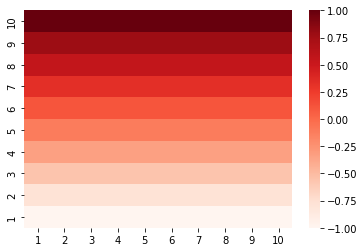

In [17]:
# triple check I'm putting out coords correctly (temp should increase to North, yes increase to the North is correct)
df = mvp03.blank_dataframe()

for pop, (sal, temp) in envdata.iterrows():
    lon, lat = locations.loc[pop]
    
    df.loc[lat, lon] = temp
    
sns.heatmap(df, cmap='Reds')

In [18]:
locations

,lon,lat
subpopID,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0
...,...,...
96,6.0,10.0
97,7.0,10.0
98,8.0,10.0


In [19]:
# one last check to make sure I have coords done correctly
# compare new coords to MVP pop coords
for pop, (lon, lat) in locations.iterrows():
   
    assert new_locs[pop] == (lon, lat)

In [20]:
inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751


In [21]:
# add population ID and new location to datafram
inds['subpopID'] = inds.index.map(samppop)

inds['lon'] = np.nan
inds['lat'] = np.nan

for pop, (lon, lat) in new_locs.items():
    inds.loc[inds.subpopID == pop, 'lon'] = lon
    inds.loc[inds.subpopID == pop, 'lat'] = lat

for col in ['lon', 'lat']:
    assert inds[col].isnull().sum() == 0
    
inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


# create SNPfiles

### identify marker sets

In [22]:
snps = pd.read_table(op.join(tdir, 'SNPs.txt'), delim_whitespace=True)

print(snps.shape)

snps.head()

(26371, 5)


,LG,pos_pyslim,mutname,a_freq_subset,causal
0,1,8,1-8,0.0175,False
1,1,27,1-27,0.0120,False
2,1,34,1-34,0.0370,False
3,1,81,1-81,0.0330,False
4,1,97,1-97,0.0170,False


In [23]:
snps.causal.value_counts()

False    26281
True        90
Name: causal, dtype: int64

In [24]:
marker_sets = {
    'all' : snps.mutname.tolist(),
    'neutral' : snps[snps.LG > 10]['mutname'].tolist(),
    'adaptive' : snps[snps.causal == True]['mutname'].tolist()
}

for marker_set, loci in marker_sets.items():
    print(marker_set, len(loci))

all 26371
neutral 13285
adaptive 90


### calculate pop allele frequencies

In [25]:
geno = pd.read_table(op.join(tdir, 'Genotypes.txt'), delim_whitespace=True, header=None)

geno.columns = snps.mutname.tolist()

print(geno.shape)

geno.head()

(1000, 26371)


,1-8,1-27,1-34,1-81,1-97,1-153,1-154,1-206,1-287,1-304,1-346,1-364,1-368,1-389,1-495,1-508,1-525,1-585,1-689,1-837,1-846,1-869,1-921,1-933,1-1024,1-1029,1-1091,1-1113,1-1155,1-1161,1-1224,1-1259,1-1301,1-1317,1-1349,1-1357,1-1388,1-1444,1-1494,1-1499,1-1538,1-1566,1-1600,1-1635,1-1650,1-1685,1-1731,1-1793,1-1820,1-1823,...,20-997839,20-997872,20-997886,20-997954,20-998047,20-998053,20-998178,20-998299,20-998326,20-998401,20-998417,20-998418,20-998432,20-998449,20-998486,20-998561,20-998625,20-998650,20-998678,20-998720,20-998749,20-998756,20-998804,20-998842,20-998965,20-999023,20-999030,20-999103,20-999154,20-999178,20-999194,20-999218,20-999235,20-999244,20-999277,20-999288,20-999344,20-999381,20-999475,20-999525,20-999561,20-999623,20-999667,20-999683,20-999693,20-999742,20-999764,20-999823,20-999845,20-999857
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
for i, j in enumerate(geno.index):
    assert i == j 

In [27]:
# calculate derived allele frequencies by counting derived alleles
pop_freqs = {}
for pop, samps in pbar(popsamps.items()):
    geno_df = geno.loc[samps]
    
    pop_freqs[pop] = dict(geno.loc[popsamps[pop]].apply(sum, axis=0) / (2*len(popsamps[pop])))

100%|███████████████| 100/100 [00:52<00:00,  1.91it/s]


In [28]:
freqs = pd.DataFrame(pop_freqs).T

print(freqs.shape)


freqs.head()

(100, 26371)


,1-8,1-27,1-34,1-81,1-97,1-153,1-154,1-206,1-287,1-304,1-346,1-364,1-368,1-389,1-495,1-508,1-525,1-585,1-689,1-837,1-846,1-869,1-921,1-933,1-1024,1-1029,1-1091,1-1113,1-1155,1-1161,1-1224,1-1259,1-1301,1-1317,1-1349,1-1357,1-1388,1-1444,1-1494,1-1499,1-1538,1-1566,1-1600,1-1635,1-1650,1-1685,1-1731,1-1793,1-1820,1-1823,...,20-997839,20-997872,20-997886,20-997954,20-998047,20-998053,20-998178,20-998299,20-998326,20-998401,20-998417,20-998418,20-998432,20-998449,20-998486,20-998561,20-998625,20-998650,20-998678,20-998720,20-998749,20-998756,20-998804,20-998842,20-998965,20-999023,20-999030,20-999103,20-999154,20-999178,20-999194,20-999218,20-999235,20-999244,20-999277,20-999288,20-999344,20-999381,20-999475,20-999525,20-999561,20-999623,20-999667,20-999683,20-999693,20-999742,20-999764,20-999823,20-999845,20-999857
1,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.666667,0.0,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.346154,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.423077,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615385,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.0,0.000000,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,0.0,0.0,0.0,0.0,0.500000,0.0,0.10,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.300000,0.100000,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0
4,0.000000,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.600000,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.0,0.0,0.0,0.0,0.200000,0.0,0.25,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.0
5,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0


### subset freqs

In [29]:
snp_files = {}
for marker_set, loci in pbar(marker_sets.items()):
    snps = freqs[loci].copy()
    
    snps['index'] = snps.index.tolist()  # for compatibility with gradient_training.R script
    
    basename = f'tutorial_Rout_Gmat_sample_maf-gt-p01_GFready_pooled_{marker_set}.txt'
    
    # save for GF
    f = op.join(training_dir, basename)
    snps.to_csv(f, sep='\t', index=False)
    
    snp_files[marker_set] = f
    
    # save for RONA
    rona_f = op.join(rona_training_dir, basename.replace("_GFready_", "_RONAready_"))
    snps[snps.columns[:-1]].T.to_csv(rona_f,
                                     sep='\t',
                                     index=True
                                    )  # drop index col, transpose

100%|███████████████| 3/3 [00:04<00:00,  1.51s/it]


# create rangedata and envdata

In [30]:
envdata

,sal_opt,temp_opt
1,-1.000000,-1.0
2,-0.777778,-1.0
3,-0.555556,-1.0
4,-0.333333,-1.0
5,-0.111111,-1.0
...,...,...
96,0.111111,1.0
97,0.333333,1.0
98,0.555556,1.0
99,0.777778,1.0


In [31]:
inds.head()

,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0


In [32]:
new_rangedata = inds.groupby('subpopID')[
    [col for col in inds if col.startswith('env')] + ['lat', 'lon']
].apply(np.mean)

new_rangedata.index.name=None

new_rangedata

,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,lat,lon
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569,1.0,1.0
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295,1.0,2.0
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803,1.0,3.0
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240,1.0,4.0
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376,1.0,5.0
...,...,...,...,...,...,...,...,...
96,-0.288220,0.261489,-0.317123,-0.018548,0.228030,-0.045559,10.0,6.0
97,-0.116570,0.323553,-0.231351,-0.269762,0.344912,0.059459,10.0,7.0
98,0.093915,0.400397,-0.150975,-0.408936,0.588880,0.274592,10.0,8.0
99,0.034177,0.399089,-0.440848,-0.464035,0.673533,0.360201,10.0,9.0


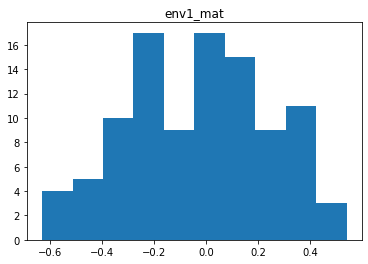

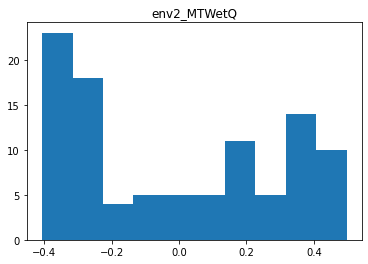

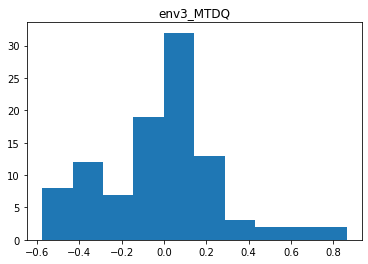

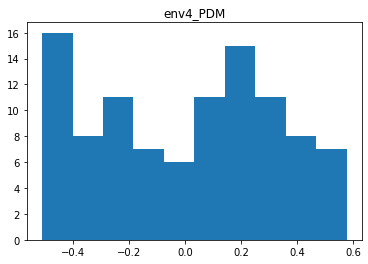

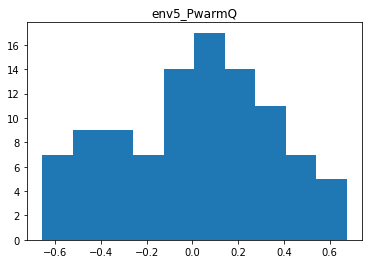

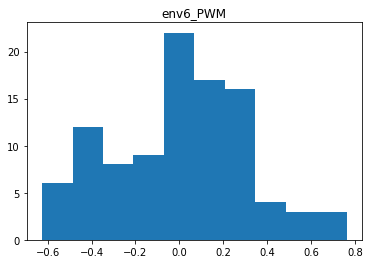

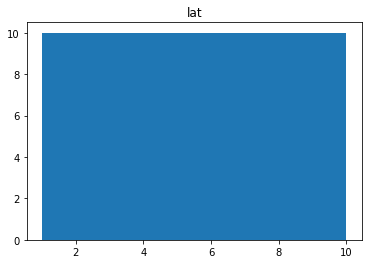

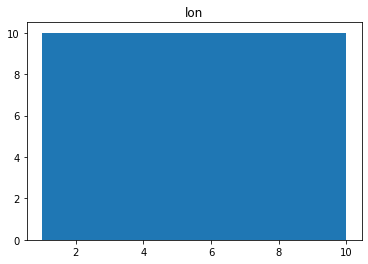

In [33]:
for col, data in new_rangedata.items():
    plt.hist(data)
    plt.title(col)
    plt.show()

In [34]:
# save range data
range_file = op.join(training_dir, 'tutorial_rangefile_GFready_pooled.txt')
new_rangedata.to_csv(range_file, index=False, sep='\t')

In [35]:
# create new envdata
new_envdata = new_rangedata[new_rangedata.columns[:-2]]

new_envdata

,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376
...,...,...,...,...,...,...
96,-0.288220,0.261489,-0.317123,-0.018548,0.228030,-0.045559
97,-0.116570,0.323553,-0.231351,-0.269762,0.344912,0.059459
98,0.093915,0.400397,-0.150975,-0.408936,0.588880,0.274592
99,0.034177,0.399089,-0.440848,-0.464035,0.673533,0.360201


In [36]:
# save new envdata
envfile = op.join(training_dir, 'tutorial_envfile_GFready_pooled.txt')
new_envdata.to_csv(envfile, sep='\t', index=True)

# create shfiles

In [37]:
rscript_exe = '/home/b.lind/anaconda3/envs/r35/lib/R/bin/Rscript'
training_script = '/home/b.lind/code/MVP-offsets/01_src/MVP_gf_training_script.R'

In [38]:
envfile

'/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_files/tutorial_envfile_GFready_pooled.txt'

In [39]:
range_file

'/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_files/tutorial_rangefile_GFready_pooled.txt'

In [40]:
training_dir

'/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_files'

In [41]:
mymem = {
    'all': '300000M',
    'adaptive': '4000M',
    'neutral': '150000M'
}

shfiles = []
for marker_set, snpfile in snp_files.items():
    basename = f'tutorial_GF_training_pooled_{marker_set}'
    
    mem = mymem[marker_set]
    
    shtext = f'''#!/bin/bash
#SBATCH --job-name={basename}
#SBATCH --time=1-00:00:00
#SBATCH --mem={mem}
#SBATCH --partition='short'
#SBATCH --output={basename}_%j.out
#SBATCH --mail-user=b.lind@northeastern.edu
#SBATCH --mail-type=FAIL

source $HOME/.bashrc  # assumed that conda init is within .bashrc
conda deactivate
conda activate r35

cd {training_dir}

{rscript_exe} \\
{training_script} \\
{snpfile} \\
{envfile} \\
{range_file} \\
{basename} \\
{gf_outdir}

'''
    sh = op.join(gf_shdir, f'{basename}.sh')
    
    with open(sh, 'w') as o:
        o.write(shtext)
    
    shfiles.append(sh)
    
    print(sh, '\n')


/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_shfiles/tutorial_GF_training_pooled_all.sh 

/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_shfiles/tutorial_GF_training_pooled_neutral.sh 

/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_shfiles/tutorial_GF_training_pooled_adaptive.sh 



In [42]:
pids = sbatch(shfiles)

sbatching: 100%|███████████████| 3/3 [00:00<00:00,  4.70it/s]


In [44]:
create_watcherfile(pids, directory=gf_shdir, watcher_name='tutorial_gf_training_watcher', end_alert=True)

sbatching: 100%|███████████████| 1/1 [00:00<00:00,  5.07it/s]


['34315840']


'/home/b.lind/offsets/run_20220919_tutorial/gradient_forests/training/training_shfiles/tutorial_gf_training_watcher.sh'

In [45]:
formatclock(dt.now() - t1, exact=True)

'0-00:01:24'

### save

In [62]:
tdir

'/home/b.lind/offsets/run_20220919_tutorial/tutorial'

In [64]:
new_indfile = op.join(tdir, 'My_Individuals.txt')
inds.to_csv(new_indfile, sep='\t', index=False, header=True)

print(new_indfile)

inds

/home/b.lind/offsets/run_20220919_tutorial/tutorial/My_Individuals.txt


,ind_index,x,y,phenotype1_mat,phenotype2_MTWetQ,phenotype3_MTDQ,phenotype4_PDM,phenotype5_PwarmQ,phenotype6_PWM,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM,subpopID,lon,lat
0,33,0.406184,0.233272,0.737967,-0.191421,0.142992,-0.131894,-0.452497,-0.541651,0.762432,-0.162238,0.261281,-0.332078,-0.471502,-0.477821,25,5.0,3.0
1,34,0.425697,0.837158,-0.274081,-0.428332,-0.012880,0.221058,0.229296,0.066597,-0.339330,-0.407667,-0.058296,0.288030,0.198810,0.017680,85,5.0,9.0
2,44,0.671673,0.581744,-0.676326,0.086629,-0.470671,0.218813,0.260098,-0.103465,-0.567733,0.090928,-0.414353,0.234899,0.230255,-0.053511,57,7.0,6.0
3,45,0.017466,0.329922,-0.283221,-0.403942,-0.333718,-0.200554,-0.345915,-0.410001,-0.245860,-0.200759,-0.267455,-0.265260,-0.389828,-0.458979,31,1.0,4.0
4,46,0.069744,0.121221,0.057616,-0.303201,0.731600,0.195679,-0.367110,0.196296,-0.121500,-0.306379,0.702858,0.211275,-0.352307,0.212751,11,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8575,0.117890,0.278449,-0.070241,-0.367056,-0.061876,-0.308041,-0.468111,-0.508108,0.476928,-0.216205,0.401987,-0.377651,-0.607663,-0.374126,22,2.0,3.0
996,8580,0.464067,0.792001,-0.050435,-0.342693,0.128758,0.107181,-0.061796,-0.081682,-0.320404,-0.411335,-0.038372,0.238443,0.145508,-0.007439,75,5.0,8.0
997,8582,0.158645,0.682325,0.354088,0.493751,0.064744,-0.243331,-0.164916,-0.244379,0.225111,0.401138,-0.016827,-0.088830,-0.017708,-0.215783,62,2.0,7.0
998,8585,0.894104,0.757964,-0.009027,0.424444,-0.575177,-0.514613,0.586778,0.266235,-0.028901,0.372221,-0.533756,-0.467916,0.559185,0.267799,79,9.0,8.0


# create muts file for RDA scripts

In [1]:
from pythonimports import *

tdir = '/home/b.lind/offsets/run_20220919_tutorial/tutorial'

snps = pd.read_table(op.join(tdir, 'SNPs.txt'), delim_whitespace=True)

print(snps.shape)

snps.head()

(26371, 5)


,LG,pos_pyslim,mutname,a_freq_subset,causal
0,1,8,1-8,0.0175,False
1,1,27,1-27,0.0120,False
2,1,34,1-34,0.0370,False
3,1,81,1-81,0.0330,False
4,1,97,1-97,0.0170,False


In [2]:
marker_sets = {
    'all' : snps.mutname.tolist(),
    'neutral' : snps[snps.LG > 10]['mutname'].tolist(),
    'adaptive' : snps[snps.causal == True]['mutname'].tolist()
}

for marker_set, loci in marker_sets.items():
    print(marker_set, len(loci))

all 26371
neutral 13285
adaptive 90


In [3]:
# label adaptive loci
snps['mutID'] = [0 if snp in marker_sets['adaptive'] else 1 for snp in snps['mutname'] ]  # RDA script looks for: muts[, 'mutID'] != 1

# add columns for neutral (script assumed 2 traits, but if it's neutral it's neutral, eh?)
# rda expects 'neutral' entries in both columns if a marker is neutral
snps['causal_temp'] = ['neutral' if snp in marker_sets['neutral'] else 'causal' for snp in snps['mutname']]
snps['causal_sal'] = snps['causal_temp'].copy()

In [4]:
snps.head()

,LG,pos_pyslim,mutname,a_freq_subset,causal,mutID,causal_temp,causal_sal
0,1,8,1-8,0.0175,False,1,causal,causal
1,1,27,1-27,0.0120,False,1,causal,causal
2,1,34,1-34,0.0370,False,1,causal,causal
3,1,81,1-81,0.0330,False,1,causal,causal
4,1,97,1-97,0.0170,False,1,causal,causal


In [ ]:
new_snpfile = op.join(tdir, 'My_SNPs.txt')
snps.to_csv(new_snpfile, sep='\t', snpex=False, header=True)

print(new_snpfile)

snps